In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 22s 2us/step
60000 train samples
10000 test samples


In [18]:
from termcolor import colored

def plot_data(my_data, cmap=None):
    plt.axis('off')
    fig = plt.imshow(my_data, cmap=cmap)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    print(fig)
    
def show_sample_image(X_train, y_train, idx=0, color='blue', cmap=None):
    print(colored('Label:', color, attrs=['bold']), y_train[idx])
    print(colored('Shape:', color, attrs=['bold']), X_train[idx].shape)
    print()
    plot_data(X_train[idx].reshape(28,28), cmap=cmap)


******************************

Label: 3
Shape: (784,)

AxesImage(54,36;334.8x217.44)


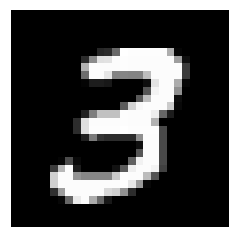

In [21]:
print('\n******************************\n')
show_sample_image(X_train, y_train, idx = 7, cmap='gray')


******************************

Label: 8
Shape: (784,)

AxesImage(54,36;334.8x217.44)


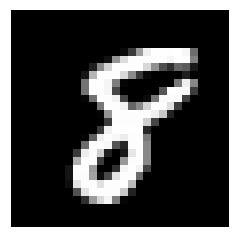

In [22]:
print('\n******************************\n')
show_sample_image(X_train, y_train, idx = 777, cmap='gray')


******************************

Label: 0
Shape: (784,)

AxesImage(54,36;334.8x217.44)


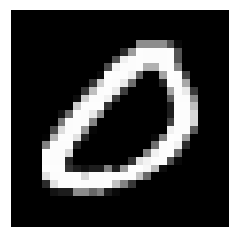

In [23]:
print('\n******************************\n')
show_sample_image(X_train, y_train, idx = 787, cmap='gray')

In [3]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [5]:
Y_train.shape

(60000, 10)

In [6]:
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

48000/48000 [==============================] - 1s 19us/step - loss: 0.1921 - acc: 0.9431 - val_loss: 0.1332 - val_acc: 0.9601
Epoch 46/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1901 - acc: 0.9444 - val_loss: 0.1316 - val_acc: 0.9615
Epoch 47/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1877 - acc: 0.9450 - val_loss: 0.1299 - val_acc: 0.9612
Epoch 48/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1867 - acc: 0.9442 - val_loss: 0.1301 - val_acc: 0.9618
Epoch 49/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1865 - acc: 0.9453 - val_loss: 0.1282 - val_acc: 0.9613
Epoch 50/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1803 - acc: 0.9461 - val_loss: 0.1267 - val_acc: 0.9621
Epoch 51/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1823 - acc: 0.9466 - val_loss: 0.1254 - val_acc: 0.9632
Epoch 52/250
48000/48000 [==============

48000/48000 [==============================] - 1s 19us/step - loss: 0.1178 - acc: 0.9647 - val_loss: 0.0942 - val_acc: 0.9723
Epoch 105/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1164 - acc: 0.9655 - val_loss: 0.0943 - val_acc: 0.9728
Epoch 106/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1170 - acc: 0.9649 - val_loss: 0.0940 - val_acc: 0.9724
Epoch 107/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1170 - acc: 0.9646 - val_loss: 0.0941 - val_acc: 0.9731
Epoch 108/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.1139 - acc: 0.9664 - val_loss: 0.0934 - val_acc: 0.9722
Epoch 109/250
48000/48000 [==============================] - 1s 22us/step - loss: 0.1146 - acc: 0.9658 - val_loss: 0.0934 - val_acc: 0.9732
Epoch 110/250
48000/48000 [==============================] - 1s 21us/step - loss: 0.1141 - acc: 0.9660 - val_loss: 0.0928 - val_acc: 0.9727
Epoch 111/250
48000/48000 [=======

48000/48000 [==============================] - 1s 19us/step - loss: 0.0885 - acc: 0.9736 - val_loss: 0.0842 - val_acc: 0.9765
Epoch 163/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0870 - acc: 0.9732 - val_loss: 0.0845 - val_acc: 0.9766
Epoch 164/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0878 - acc: 0.9730 - val_loss: 0.0841 - val_acc: 0.9768
Epoch 165/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0860 - acc: 0.9734 - val_loss: 0.0839 - val_acc: 0.9764
Epoch 166/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0863 - acc: 0.9732 - val_loss: 0.0848 - val_acc: 0.9766
Epoch 167/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0858 - acc: 0.9738 - val_loss: 0.0846 - val_acc: 0.9762
Epoch 168/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0838 - acc: 0.9747 - val_loss: 0.0843 - val_acc: 0.9760
Epoch 169/250
48000/48000 [=======

48000/48000 [==============================] - 1s 19us/step - loss: 0.0690 - acc: 0.9790 - val_loss: 0.0802 - val_acc: 0.9773
Epoch 221/250
48000/48000 [==============================] - 1s 18us/step - loss: 0.0705 - acc: 0.9779 - val_loss: 0.0810 - val_acc: 0.9769
Epoch 222/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0687 - acc: 0.9788 - val_loss: 0.0807 - val_acc: 0.9773
Epoch 223/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0707 - acc: 0.9775 - val_loss: 0.0806 - val_acc: 0.9773
Epoch 224/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0699 - acc: 0.9789 - val_loss: 0.0803 - val_acc: 0.9774
Epoch 225/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0674 - acc: 0.9789 - val_loss: 0.0805 - val_acc: 0.9779
Epoch 226/250
48000/48000 [==============================] - 1s 19us/step - loss: 0.0683 - acc: 0.9788 - val_loss: 0.0804 - val_acc: 0.9772
Epoch 227/250
48000/48000 [=======

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


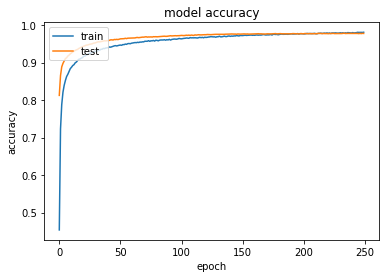

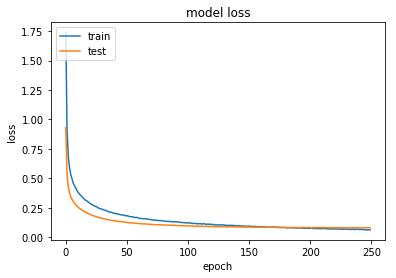

In [7]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Result
> A few lines of code, and your computer is able to recognize handwritten numbers.